### Connect to Drive

In [2]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd "/gdrive/My Drive/[2023-2024] AN2DL/Lecture 1"

### Import libraries

In [3]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [4]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.10.0


In [5]:
# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Load data

In [6]:
# Load the Iris dataset into a variable called 'data'
data = load_iris()

# Print the description of the Iris dataset
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

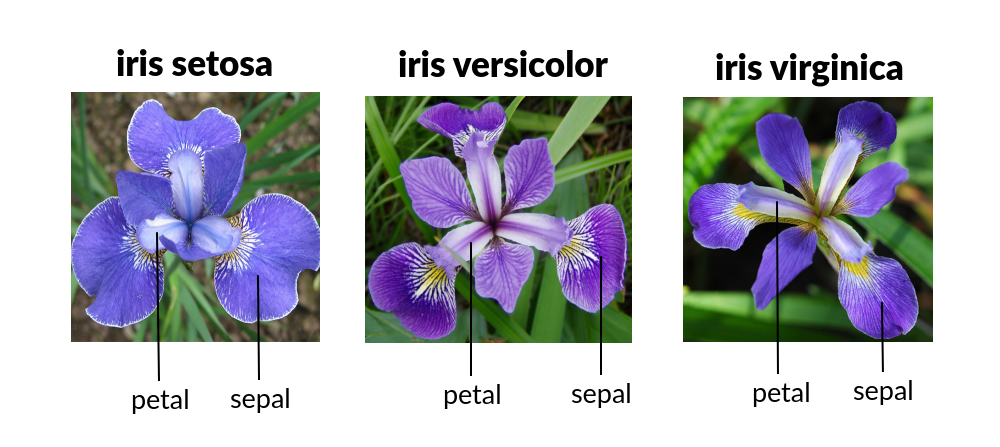

### Inspect data

In [7]:
# Create a DataFrame 'iris_dataset' from the Iris dataset
iris_dataset = pd.DataFrame(data.data, columns=data.feature_names)
print('Iris dataset shape', iris_dataset.shape)

# Display the first 10 rows of the Iris dataset
iris_dataset.head(10)

Iris dataset shape (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
# Generate summary statistics for the Iris dataset
iris_dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Get the target values from the Iris dataset
target = data.target
print('Target shape', target.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(target, return_counts=True)
print('Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Target shape (150,)
Target labels: [0 1 2]
Class 0 has 50 samples
Class 1 has 50 samples
Class 2 has 50 samples


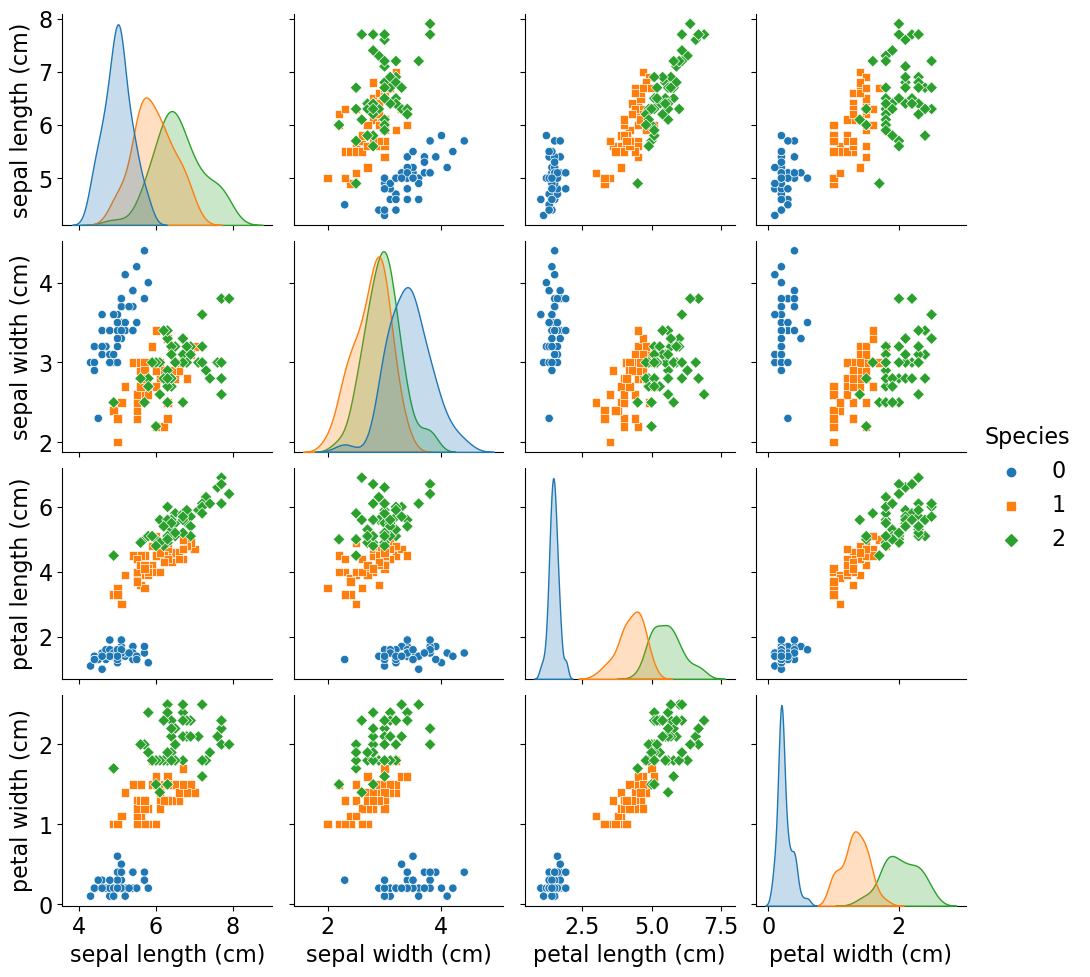

In [10]:
# Copy the iris dataset, assign target labels, and plot using seaborn
plot_dataset = iris_dataset.copy()
plot_dataset["Species"] = target
sns.pairplot(plot_dataset, hue="Species", palette="tab10", markers=["o", "s", "D"],)
plt.show()
del plot_dataset # Clean up

#### Split in train, validation and test

In [11]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    iris_dataset,
    target,
    test_size = 30,
    random_state = seed,
    stratify = target
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = 30,
    random_state = seed,
    stratify = y_train_val
)

# Print the shapes of the resulting sets
print('Training set shape:\t',X_train.shape, y_train.shape)
print('Validation set shape:\t',X_val.shape, y_val.shape)
print('Test set shape:\t\t',X_test.shape, y_test.shape)

Training set shape:	 (90, 4) (90,)
Validation set shape:	 (30, 4) (30,)
Test set shape:		 (30, 4) (30,)


### Process data

In [12]:
# Compute and store the maximum values for each feature in the training dataset
max_df = X_train.max()
print('Iris dataset maximum valus')
print(max_df)

# Compute and store the minimum values for each feature in the training dataset
min_df = X_train.min()
print('\nIris dataset minimum valus')
print(min_df)

Iris dataset maximum valus
sepal length (cm)    7.9
sepal width (cm)     3.9
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

Iris dataset minimum valus
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.1
petal width (cm)     0.1
dtype: float64


In [13]:
# Normalise the dataset splits in the range [0,1]
X_train = (X_train - min_df)/(max_df - min_df)
X_val = (X_val - min_df)/(max_df - min_df)
X_test = (X_test - min_df)/(max_df - min_df)

In [14]:
# Inspect the effects of data normalisation
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,90.000000,90.000000,90.000000,90.000000
mean,0.426852,0.533333,0.457088,0.457407
std,0.240597,0.219104,0.305532,0.317200
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.381579,0.086207,0.083333
50%,0.402778,0.526316,0.543103,0.500000
75%,0.583333,0.631579,0.689655,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [15]:
# Transform labels via one-hot encoding
# i.e. 0 -> [1,0,0], 1 -> [0,1,0], 2 -> [0,0,1]
y_train = tfk.utils.to_categorical(y_train, num_classes=len(unique))
y_val = tfk.utils.to_categorical(y_val, num_classes=len(unique))
y_test = tfk.utils.to_categorical(y_test, num_classes=len(unique))

print('Training set target shape:\t',y_train.shape)
print('Validation set target shape:\t',y_val.shape)
print('Test set target shape:\t\t',y_test.shape)

Training set target shape:	 (90, 3)
Validation set target shape:	 (30, 3)
Test set target shape:		 (30, 3)


In [16]:
# Determine the input shape for the neural network,
# which corresponds to the number of features in the input data
input_shape = X_train.shape[1:]
print(f'Input shape of the network {input_shape}')

# Determine the output shape for the neural network,
# which corresponds to the number of classes in the classification task
output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (4,)
Output shape of the network 3


In [17]:
# Define the batch size, which is the number of samples processed in each training iteration
batch_size = 16

# Define the number of training epochs,
# which is the number of times the entire dataset is passed through the network during training
epochs = 500

### Build the model

In [18]:
def build_model(
    input_shape,
    output_shape,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    hidden_layer = tfkl.Dense(units=128, name='Hidden')(input_layer)
    hidden_activation = tfkl.Activation('relu', name='HiddenActivation')(hidden_layer)

    output_layer = tfkl.Dense(units=output_shape, name='Output')(hidden_activation)
    output_activation = tfkl.Activation('softmax', name='Softmax')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='Feedforward')

    # Compile the model
    loss = tfk.losses.CategoricalCrossentropy()
    learning_rate = 0.01
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

Model: "Feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 4)]               0         
                                                                 
 Hidden (Dense)              (None, 128)               640       
                                                                 
 HiddenActivation (Activatio  (None, 128)              0         
 n)                                                              
                                                                 
 Output (Dense)              (None, 3)                 387       
                                                                 
 Softmax (Activation)        (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_____________________________________________________

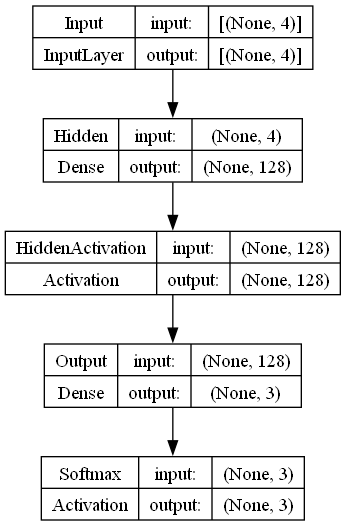

In [19]:
model = build_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model, show_shapes=True, expand_nested=True)

### Train the model

In [20]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, y_val)
).history

Epoch 1/500
6/6 [==============================] - 1s 62ms/step - loss: 1.1163 - Accuracy: 0.3333 - val_loss: 1.0951 - val_Accuracy: 0.3333
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 1.1007 - Accuracy: 0.3333 - val_loss: 1.0792 - val_Accuracy: 0.3667
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 1.0858 - Accuracy: 0.3444 - val_loss: 1.0647 - val_Accuracy: 0.4333
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 1.0722 - Accuracy: 0.4222 - val_loss: 1.0519 - val_Accuracy: 0.5000
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 1.0598 - Accuracy: 0.5667 - val_loss: 1.0397 - val_Accuracy: 0.5333
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 1.0481 - Accuracy: 0.6111 - val_loss: 1.0285 - val_Accuracy: 0.6333
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 1.0374 - Accuracy: 0.6556 - val_loss: 1.0174 - val_Accuracy: 0.6667
Epoch 8/500
6/6 [======

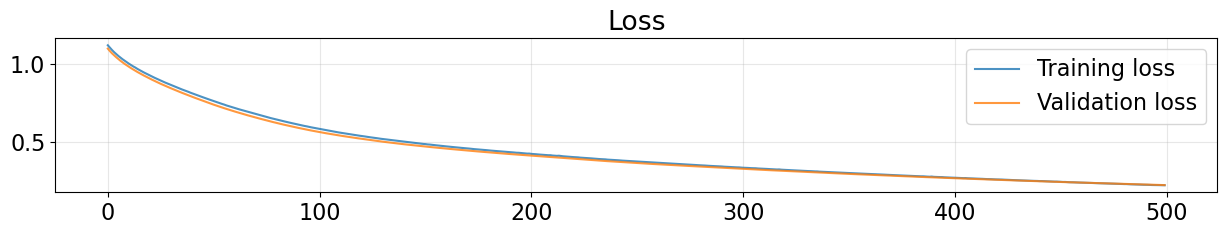

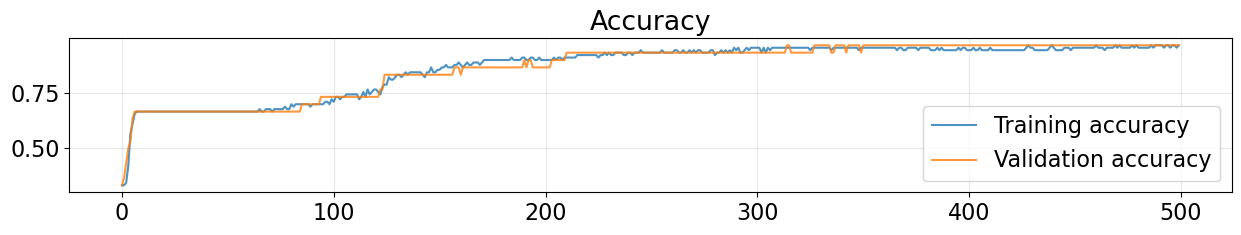

In [21]:
# Create and display plots for training and validation loss
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create and display plots for training and validation accuracy
plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_Accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [22]:
# Save the trained model
model.save('Iris_Feedforward')

In [23]:
# Delete the model
del model

In [24]:
# Load the model
model = tfk.models.load_model('Iris_Feedforward')
model.summary()

Model: "Feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 4)]               0         
                                                                 
 Hidden (Dense)              (None, 128)               640       
                                                                 
 HiddenActivation (Activatio  (None, 128)              0         
 n)                                                              
                                                                 
 Output (Dense)              (None, 3)                 387       
                                                                 
 Softmax (Activation)        (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_____________________________________________________

### Make inference

In [25]:
# Training set prediction
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions,axis=-1)

train_gt = np.argmax(y_train,axis=-1)

train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy,4)}')

Accuracy score over the train set: 0.9667


In [26]:
# Validation set prediction
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

val_gt = np.argmax(y_val, axis=-1)

val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

Accuracy score over the validation set: 0.9667


In [27]:
# Test set prediction
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

test_gt = np.argmax(y_test, axis=-1)

test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

Accuracy score over the test set: 0.9333


### TODO Exercise
Perform the same classification analysis on the Penguins dataset to predict the correct species

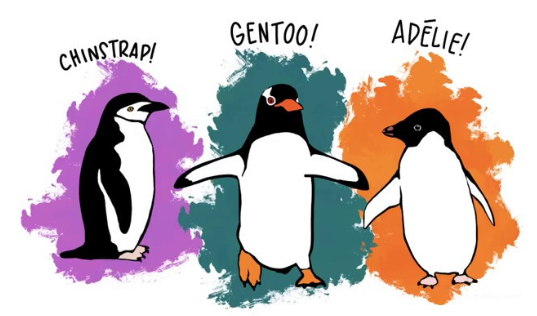

```
```



In [28]:
# Define the batch size, which is the number of samples processed in each training iteration
batch_size = 16

# Define the number of training epochs,
# which is the number of times the entire dataset is passed through the network during training
epochs = 500

In [29]:
def build_model(
    input_shape,
    output_shape,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    hidden_layer = tfkl.Dense(units=128, name='Hidden')(input_layer)
    hidden_activation = tfkl.Activation('relu', name='HiddenActivation')(hidden_layer)

    output_layer = tfkl.Dense(units=output_shape, name='Output')(hidden_activation)
    output_activation = tfkl.Activation('softmax', name='Softmax')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='Feedforward')

    # Compile the model
    loss = tfk.losses.CategoricalCrossentropy()
    learning_rate = 0.01
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

In [30]:
data = pd.read_csv('penguins.csv')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [31]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv('penguins.csv')
data.dropna(subset=["species"], inplace=True)
X = data.drop("species", axis=1)
y = pd.DataFrame(data["species"])

# Define different features and transformer pipelines
categorical_features_X = ["island", "sex"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

# door_feature = ["Doors"]
# door_transformer = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features_X = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor_X = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features_X),
        # ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features_X)])

####################

categorical_features_y = ["species"]
categorical_transformer_y = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor_y = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer_y, categorical_features_y)])

X_preprocessed = preprocessor_X.fit_transform(X)
Y_preprocessed = preprocessor_y.fit_transform(y)

In [32]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_preprocessed,
    Y_preprocessed,
    test_size = 0.6,
    random_state = seed,
    # stratify = y
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = 0.2,
    random_state = seed,
    # stratify = y_train_val
)

In [33]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,1.0,0.0,40.8,18.9,208.0,4300.0
1,1.0,0.0,0.0,0.0,1.0,0.0,49.9,16.1,213.0,5400.0
2,1.0,0.0,0.0,0.0,1.0,0.0,46.2,14.9,221.0,5300.0
3,1.0,0.0,0.0,1.0,0.0,0.0,47.5,14.2,209.0,4600.0
4,1.0,0.0,0.0,0.0,1.0,0.0,37.7,18.7,180.0,3600.0


In [34]:
# Determine the input shape for the neural network,
# which corresponds to the number of features in the input data
input_shape = pd.DataFrame(X_train).shape[1:]
print(f'Input shape of the network {input_shape}')

# Determine the output shape for the neural network,
# which corresponds to the number of classes in the classification task
output_shape = pd.DataFrame(y_train).shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (10,)
Output shape of the network 3


In [35]:
# Normalize the data
max_df = pd.DataFrame(X_train).max()
min_df = pd.DataFrame(X_train).min()

X_train = (pd.DataFrame(X_train) - min_df) / (max_df - min_df)
X_val = (pd.DataFrame(X_val) - min_df) / (max_df - min_df)
X_test = (pd.DataFrame(X_test) - min_df) / (max_df - min_df)

Model: "Feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 10)]              0         
                                                                 
 Hidden (Dense)              (None, 128)               1408      
                                                                 
 HiddenActivation (Activatio  (None, 128)              0         
 n)                                                              
                                                                 
 Output (Dense)              (None, 3)                 387       
                                                                 
 Softmax (Activation)        (None, 3)                 0         
                                                                 
Total params: 1,795
Trainable params: 1,795
Non-trainable params: 0
_____________________________________________________

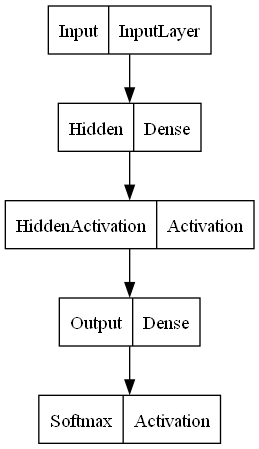

In [36]:
model = build_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model)

In [37]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, y_val)
).history

Epoch 1/500
7/7 [==============================] - 1s 44ms/step - loss: 1.1085 - Accuracy: 0.3303 - val_loss: 1.0867 - val_Accuracy: 0.4643
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0829 - Accuracy: 0.4771 - val_loss: 1.0728 - val_Accuracy: 0.5000
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0601 - Accuracy: 0.5596 - val_loss: 1.0604 - val_Accuracy: 0.5000
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0384 - Accuracy: 0.6147 - val_loss: 1.0483 - val_Accuracy: 0.5000
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0194 - Accuracy: 0.6422 - val_loss: 1.0368 - val_Accuracy: 0.5714
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0010 - Accuracy: 0.6422 - val_loss: 1.0261 - val_Accuracy: 0.5714
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 0.9842 - Accuracy: 0.6972 - val_loss: 1.0159 - val_Accuracy: 0.5714
Epoch 8/500
7/7 [=========

In [38]:
# Training set prediction
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions,axis=-1)

train_gt = np.argmax(y_train,axis=-1)

train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy,4)}')

Accuracy score over the train set: 1.0


In [39]:
# Validation set prediction
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

val_gt = np.argmax(y_val, axis=-1)

val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

Accuracy score over the validation set: 1.0


In [40]:
# Test set prediction
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

test_gt = np.argmax(y_test, axis=-1)

test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

Accuracy score over the test set: 0.9903


*Credits: Eugenio Lomurno, 📧 eugenio.lomurno@polimi.it*